<a href="https://colab.research.google.com/github/samruddhideode/Sanvadita/blob/main/sanvadita_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.naive_bayes import  MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, accuracy_score

from matplotlib import pyplot as plt

In [2]:
train_set= pd.read_csv("https://raw.githubusercontent.com/l3cube-pune/MarathiNLP/main/L3CubeMahaSent%20Dataset/tweets-train.csv")
test_set= pd.read_csv("https://raw.githubusercontent.com/l3cube-pune/MarathiNLP/main/L3CubeMahaSent%20Dataset/tweets-test.csv")
valid_set= pd.read_csv("https://raw.githubusercontent.com/l3cube-pune/MarathiNLP/main/L3CubeMahaSent%20Dataset/tweets-valid.csv")

In [7]:
def pre_process(text):
  words = text.split(' ')
  new_words = []
  for word in words:
    if(word == ''): # null strings removed
      continue
    elif(re.search("[a-zA-Z0-9]+", word)): # remove english words and numbers
      continue
    elif(re.search("@[^\s]+", word)): # remove mentions
      continue
    elif(re.search("#[^\s]+", word)): # remove hashtags
      continue
    else:
      word = word.translate(str.maketrans('', '', string.punctuation))
      word = word.replace('\n','')
      new_words.append(word)
  return(new_words)

In [9]:
# convert tweets to a list of constituent words (pre-processing 1) 

train_tweets = []
for tweet in train_set.tweet:
  processed = pre_process(tweet)
  train_tweets.append(processed)

test_tweets = []
for tweet in test_set.tweet:
  processed = pre_process(tweet)
  test_tweets.append(processed)

valid_tweets = []
for tweet in valid_set.tweet:
  processed = pre_process(tweet)
  valid_tweets.append(processed)

print(train_tweets[:10])
print(test_tweets[:10])
print(valid_tweets[:10])


[['ज्येष्ठ', 'पत्रकार', 'अनंत', 'दीक्षित', 'यांच्या', 'निधनाचे', 'वृत्त', 'दुखद', 'आहे', 'चार', 'दशकं', 'त्यांनी', 'आपल्या', 'परखड', 'लेखणीने', 'पत्रकारितेत', 'अमूल्य', 'योगदान', 'दिले', 'दीक्षित', 'यांच्या', 'मार्गदर्शनाखाली', 'पत्रकारांची', 'पिढी', 'घडली', 'अनंत', 'दीक्षित', 'यांना', 'भावपूर्ण', 'श्रद्धांजली', 'आम्ही', 'त्यांच्या', 'परिवाराच्या', 'दुखात', 'सहभागी', 'आहोत'], ['सर्वोच्च', 'न्यायालयाचे', 'निर्देश', 'डावलून', 'पुणे', 'पोलिसांनी', 'प्रा', 'आनंद', 'तेलतुंबडेंना', 'अटक', 'केली', 'मात्र', 'न्यायालयाने', 'त्यांची', 'अटक', 'बेकायदेशीर', 'ठरवून', 'सरकारला', 'जोरदार', 'चपराक', 'लगावली', 'आहे', 'कायदा', 'हातात', 'घेणाया', 'पोलीस', 'अधिकायांवर', 'तात्काळ', 'कारवाई', 'केली'], ['उद्धव', 'ठाकरेंनी', 'भाजपासोबत', 'युती', 'करून', 'शिवसैनिकांचा', 'अवमान', 'व', 'विश्वासघात', 'केला', 'आहे', 'फसवणूक', 'झालेल्या', 'शिवसैनिकांबद्दल', 'मला', 'सहानुभूती', 'असून', 'स्वार्थासाठी', 'उद्धव', 'ठाकरे', 'भाजपसोबत', 'गेले', 'तरी', 'मोदींचे', 'सरकार', 'घालवण्यातच', 'महाराष्ट्राचे', 'हित', 'आहे', 'हे', 

In [24]:
# vectorisation (pre-processing 2)
def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)
count = CountVectorizer(tokenizer=identity_tokenizer, lowercase=False)

In [28]:
# use fit_transform() only while TRAINING, otherwise use transform()

vector_tfidf_training = tfidf.fit_transform(train_tweets) #x1_train
vector_count_training = count.fit_transform(train_tweets) #x2_train

vector_tfidf_testing = tfidf.transform(test_tweets) #x1_test
vector_count_testing = count.transform(test_tweets) #x2_test

vector_tfidf_valid = tfidf.transform(valid_tweets) #x1_valid
vector_count_valid = count.transform(valid_tweets) #x2_valid

Training Naive Bayes

In [33]:
# model training

# naive-bayes
nb_tfidf = MultinomialNB()
nb_tfidf.fit(vector_tfidf_training,train_set.label)

nb_count = MultinomialNB()
nb_count.fit(vector_count_training,train_set.label)

MultinomialNB()

1. calculating roc_auc and accuracy using tfidf

In [ ]:
train_roc = roc_auc_score(train_set.label,nb_tfidf.predict_proba(vector_tfidf_training),multi_class='ovr')
test_roc = roc_auc_score(test_set.label,nb_tfidf.predict_proba(vector_tfidf_testing),multi_class='ovr')
valid_roc = roc_auc_score(valid_set.label,nb_tfidf.predict_proba(vector_tfidf_valid),multi_class='ovr')

print("With tfidf vectorisation: ")
print("train roc_auc: ",train_roc)
print("test roc_auc: ", test_roc)
print("valid roc_auc: ", valid_roc)

train_auc = accuracy_score(train_set.label, nb_tfidf.predict(vector_tfidf_training))
test_auc = accuracy_score(test_set.label,nb_tfidf.predict(vector_tfidf_testing))
valid_auc = accuracy_score(valid_set.label,nb_tfidf.predict(vector_tfidf_valid))

print("\n")
print("train auc: ",train_auc)
print("test auc: ", test_auc)
print("valid auc: ", valid_auc)

2. Calculating roc_auc and accuracy using count vectorisation

In [ ]:
train_roc = roc_auc_score(train_set.label,nb_count.predict_proba(vector_count_training),multi_class='ovr')
test_roc = roc_auc_score(test_set.label,nb_count.predict_proba(vector_count_testing),multi_class='ovr')
valid_roc = roc_auc_score(valid_set.label,nb_count.predict_proba(vector_count_valid),multi_class='ovr')

print("With count vectorisation: ")
print("train roc_auc: ",train_roc)
print("test roc_auc: ", test_roc)
print("valid roc_auc: ", valid_roc)

train_auc = accuracy_score(train_set.label, nb_count.predict(vector_count_training))
test_auc = accuracy_score(test_set.label,nb_count.predict(vector_count_testing))
valid_auc = accuracy_score(valid_set.label,nb_count.predict(vector_count_valid))

print("\n")
print("train auc: ",train_auc)
print("test auc: ", test_auc)
print("valid auc: ", valid_auc)

Training KNN

1. calculating roc_auc using tfidf 

In [53]:
# model training 
# knn

tfidf_roc_auc_train=[]
tfidf_roc_auc_test=[]

#roc_auc_scores
for k in range(1,101):
  knn_tfidf = KNeighborsClassifier(n_neighbors=k)
  knn_tfidf.fit(vector_tfidf_training,train_set.label)
  tfidf_roc_auc_train.append(roc_auc_score(train_set.label,knn_tfidf.predict_proba(vector_tfidf_training),multi_class='ovr'))
  tfidf_roc_auc_test.append(roc_auc_score(test_set.label,knn_tfidf.predict_proba(vector_tfidf_testing),multi_class='ovr'))


1. calculating accuracy using tfidf

In [70]:
tfidf_auc_train=[]
tfidf_auc_test=[]

#accuracy scores
for k in range(1,101):
  knn_tfidf = KNeighborsClassifier(n_neighbors=k)
  knn_tfidf.fit(vector_tfidf_training,train_set.label)
  tfidf_auc_train.append(accuracy_score(train_set.label,knn_tfidf.predict(vector_tfidf_training)))
  tfidf_auc_test.append(accuracy_score(test_set.label,knn_tfidf.predict(vector_tfidf_testing)))


2. calculating roc_auc using count based vectorisation

In [58]:
# count based vectorisation
count_roc_auc_train=[]
count_roc_auc_test=[]

# roc_auc_scores
for k in range(1,101):
  knn_count = KNeighborsClassifier(n_neighbors=k)
  knn_count.fit(vector_count_training,train_set.label)
  count_roc_auc_train.append(roc_auc_score(train_set.label,knn_count.predict_proba(vector_count_training),multi_class='ovr'))
  count_roc_auc_test.append(roc_auc_score(test_set.label,knn_count.predict_proba(vector_count_testing),multi_class='ovr'))

2. calculating accuracy using count based vectorisation

In [72]:
count_auc_train=[]
count_auc_test=[]

# accuracy_scores
for k in range(1,101):
  knn_count = KNeighborsClassifier(n_neighbors=k)
  knn_count.fit(vector_count_training,train_set.label)
  count_auc_train.append(accuracy_score(train_set.label,knn_count.predict(vector_count_training)))
  count_auc_test.append(accuracy_score(test_set.label,knn_count.predict(vector_count_testing)))

plotting k roc_auc for TRAINING
1. using tfidf
2. using count vectorisation

In [ ]:
k_range=range(1,101)
plt.plot(k_range,tfidf_roc_auc_train, label="training roc_auc score")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

k_range=range(1,101)
plt.plot(k_range,count_roc_auc_train, label="training roc_auc score")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

plotting k roc_auc for TESTING using TFIDF

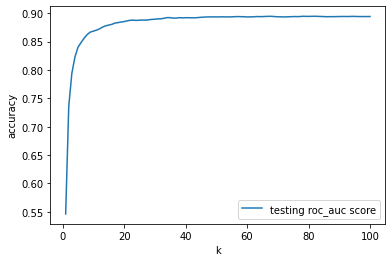

In [55]:
k_range=range(1,101)
plt.title("knn using tfidf")
plt.plot(k_range,tfidf_roc_auc_test, label="testing roc_auc score")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

plotting k roc_auc for TESTING using count vectorisation

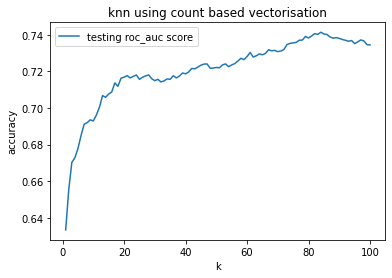

In [82]:
k_range=range(1,101)
plt.title("knn using count based vectorisation")
plt.plot(k_range,count_roc_auc_test, label="testing roc_auc score")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [56]:
max_roc_auc_k = tfidf_roc_auc_test.index(max(tfidf_roc_auc_test))
print("max roc_auc at k: ", max_roc_auc_k)

max roc_auc at k:  81


Traing tfidf knn with k = 81

In [74]:
# tfidf
#training knn model with k =81
knn_tfidf = KNeighborsClassifier(n_neighbors=81)
knn_tfidf.fit(vector_tfidf_training,train_set.label)

train_roc_auc = roc_auc_score(train_set.label,knn_tfidf.predict_proba(vector_tfidf_training),multi_class='ovr')
test_roc_auc = roc_auc_score(test_set.label,knn_tfidf.predict_proba(vector_tfidf_testing),multi_class='ovr')
valid_roc_auc = roc_auc_score(valid_set.label,knn_tfidf.predict_proba(vector_tfidf_valid),multi_class='ovr')

train_auc = accuracy_score(train_set.label,knn_tfidf.predict(vector_tfidf_training))
test_auc = accuracy_score(test_set.label,knn_tfidf.predict(vector_tfidf_testing))
valid_auc = accuracy_score(valid_set.label,knn_tfidf.predict(vector_tfidf_valid))

In [76]:
print("With tfidf vectorisation: ")
print("train roc_auc: ",train_roc_auc)
print("test roc_auc: ", test_roc_auc)
print("valid roc_auc: ", valid_roc_auc)

print("\n")
print("train accuracy: ",train_auc)
print("test accuracy: ", test_auc)
print("valid accuracy: ", valid_auc)

With tfidf vectorisation: 
train roc_auc:  0.897986484350462
test roc_auc:  0.8944201481481482
valid roc_auc:  0.900557


train accuracy:  0.7365032194155523
test accuracy:  0.7373333333333333
valid accuracy:  0.742


In [61]:
max_roc_auc_k = count_roc_auc_test.index(max(count_roc_auc_test))
print("max roc_auc at k: ", max_roc_auc_k)

max roc_auc at k:  83


training knn with k=83 for Count based vectorisation

In [84]:
# count based vectorisation
#training knn model with k =83
knn_count = KNeighborsClassifier(n_neighbors=81)
knn_count.fit(vector_count_training,train_set.label)

train_roc_auc = roc_auc_score(train_set.label,knn_count.predict_proba(vector_count_training),multi_class='ovr')
test_roc_auc = roc_auc_score(test_set.label,knn_count.predict_proba(vector_count_testing),multi_class='ovr')
valid_roc_auc = roc_auc_score(valid_set.label,knn_count.predict_proba(vector_count_valid),multi_class='ovr')

train_roc_auc = accuracy_score(train_set.label,knn_count.predict(vector_count_training))
test_roc_auc = accuracy_score(test_set.label,knn_count.predict(vector_count_testing))
valid_roc_auc = accuracy_score(valid_set.label,knn_count.predict(vector_count_valid))

print("With count vectorisation: ")
print("train roc_auc: ",train_roc_auc)
print("test roc_auc: ", test_roc_auc)
print("valid roc_auc: ", valid_roc_auc)

print("\n")
print("train accuracy: ",train_auc)
print("test accuracy: ", test_auc)
print("valid accuracy: ", valid_auc)

With count vectorisation: 
train roc_auc:  0.38732045567112433
test roc_auc:  0.3888888888888889
valid roc_auc:  0.392


train accuracy:  0.7365032194155523
test accuracy:  0.7373333333333333
valid accuracy:  0.742


In [81]:
print("With count vectorisation: ")
print("train roc_auc: ",train_roc_auc)
print("test roc_auc: ", test_roc_auc)
print("valid roc_auc: ", valid_roc_auc)

print("\n")
print("train accuracy: ",train_auc)
print("test accuracy: ", test_auc)
print("valid accuracy: ", valid_auc)

With count vectorisation: 
train roc_auc:  0.387072808320951
test roc_auc:  0.38666666666666666
valid roc_auc:  0.3933333333333333


train accuracy:  0.7365032194155523
test accuracy:  0.7373333333333333
valid accuracy:  0.742
